In [2]:
# import
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [4]:
print(data.shape)

(743, 2)


In [5]:
x = data[:, 0];
y = data[:, 1]

print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
# CHECK  how many are NaN
sp.sum(sp.isnan(y))

8

In [7]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

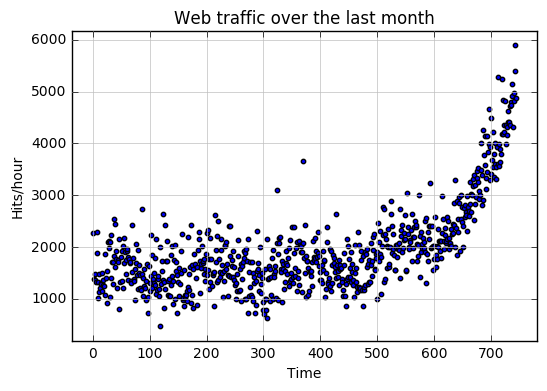

In [11]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(tight=True)

#plt.xticks([w*7*24 for w in range(10)],
#               ['week %i' % w for w in range(10)])

plt.show()

In [13]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x,y,1, full=True)

In [14]:
print("Model parameters: %s" % fp1)

Model parameters: [   2.59619213  989.02487106]


In [15]:
print(residuals)

[  3.17389767e+08]


In [18]:
# this means func is - f(x) = 2.59619213 * x + 989.02487106
f1 = sp.poly1d(fp1)

In [25]:
# error func
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [26]:
error(f1, x, y)  # calculated error and residuals should be equal if model is fit

317389767.33977801

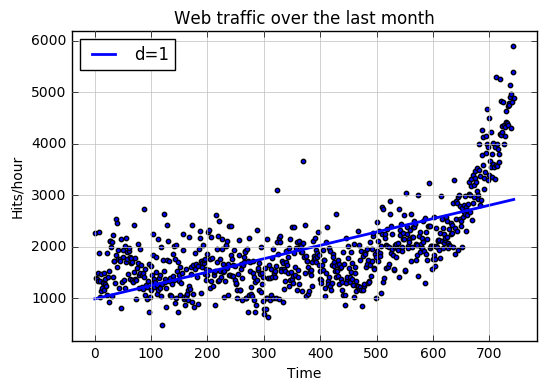

In [29]:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=2)
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(tight=True)

    f(x) = 2.59619213 * x + 989.02487106

In [30]:
# let's see how our data is fit with polynomial of degree 2
fp2 = sp.polyfit(x, y, 2)
fp2

array([  1.05322215e-02,  -5.26545650e+00,   1.97476082e+03])

In [33]:
f2 = sp.poly1d(fp2)
f2

poly1d([  1.05322215e-02,  -5.26545650e+00,   1.97476082e+03])

In [34]:
error(f2, x, y)

179983507.87817919

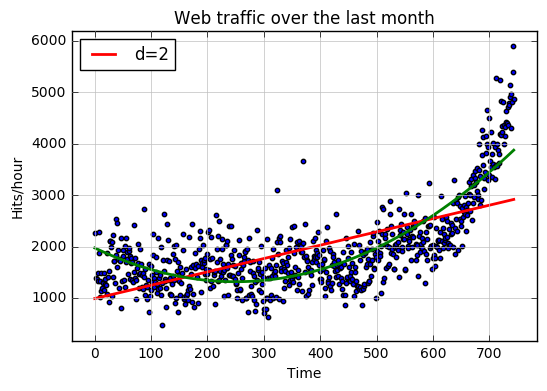

In [39]:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=2, color='red')
plt.plot(fx, f2(fx), linewidth=2, color='green')
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.legend(["d=%i" % f2.order], loc="upper left")


plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(tight=True)

    model func (2 degree polynomial)
    f(x) = 0.00105322215 * x**2 - 5.26545650 * x + 1974.76082